In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load palmerpenguins dataset

Source:
https://github.com/allisonhorst/palmerpenguins

In [2]:
penguins_original = pd.read_csv(
    'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins.csv'
    )

In [3]:
# full_penguins_original = pd.read_csv(
#     'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/main/inst/extdata/penguins_raw.csv'
# )

In [4]:
# penguins_original = sns.load_dataset("penguins")
# penguins_original

# Data description and visualization

In [5]:
penguins_original

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [6]:
penguins_original.shape

(344, 8)

In [7]:
penguins_original.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [8]:
penguins_original = penguins_original.astype({
                'species': 'category',
                 'island': 'category',
                 'sex': 'category'})

In [9]:
penguins_original.dtypes

species              category
island               category
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                  category
year                    int64
dtype: object

In [10]:
penguins_original[['species', 'island', 'sex', 'year']].nunique()

species    3
island     3
sex        2
year       3
dtype: int64

## Preprocessing: Null Values

In [11]:
# count how many NaN values are in each column
penguins_original.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [12]:
nan_indexes = penguins_original.index[penguins_original.isna().any(axis=1)]
nan_indexes

Int64Index([3, 8, 9, 10, 11, 47, 178, 218, 256, 268, 271], dtype='int64')

In [13]:
# show the rows with NaN values
penguins_original.loc[nan_indexes]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN,2007
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN,2007
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN,2007
178,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN,2007
218,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN,2008
256,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN,2009
268,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN,2009


In [14]:

penguins = penguins_original.dropna(axis = 0, how = 'any').copy()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [15]:
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

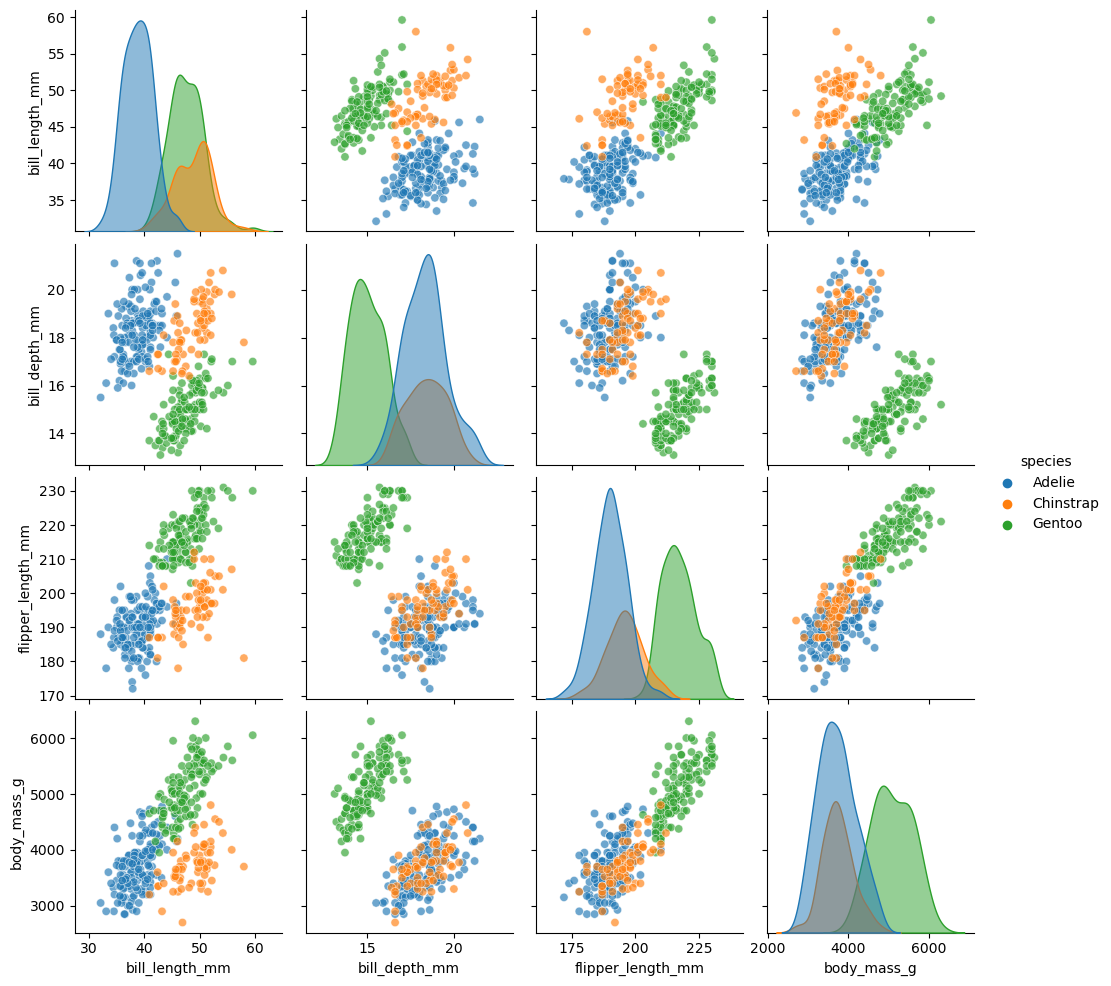

In [16]:
sns.pairplot(penguins, hue="species", 
    vars = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    # diag_kws=dict(alpha=0.5),
    plot_kws=dict(alpha=0.65)
    )

## Observations:
* bill_length_mm is the better parameter to differentiate penguins by species,  
    since it can be combined with other measurements to visualize separated groups.
* Females tend to be clustered close to males of the same species, but with a smaller size/weight.

# Frequencies

## species

In [17]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

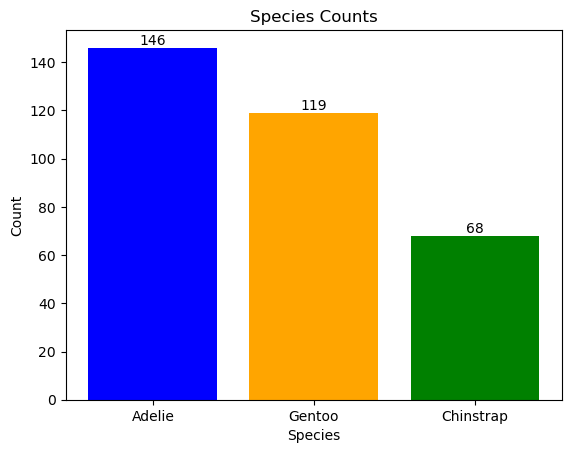

In [18]:
species_list = penguins['species'].value_counts().index
species_counts = penguins['species'].value_counts().values

barplot_species = plt.bar(species_list, species_counts, color = ['blue', 'orange', 'green'])
plt.title('Species Counts')
plt.xlabel('Species')
plt.ylabel('Count')
plt.bar_label(barplot_species, labels = species_counts)
plt.show()

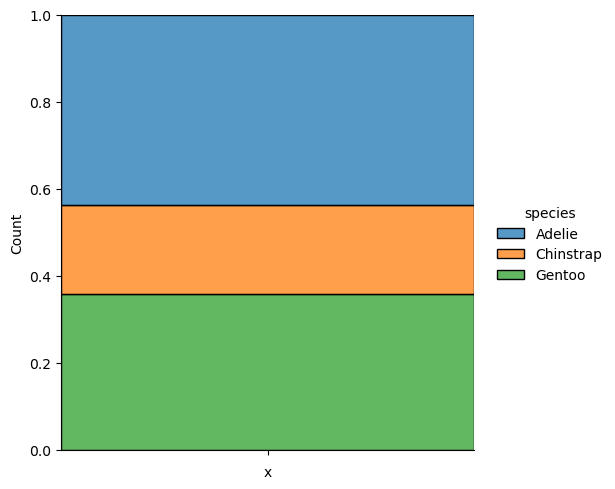

In [43]:
(
penguins
    .assign( x = '')
    .pipe(
        lambda df: (
            sns.displot(
                df,
                x = 'x',
                hue = 'species',
                multiple = 'fill' )
        )

    )
)

## island

In [19]:
penguins['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

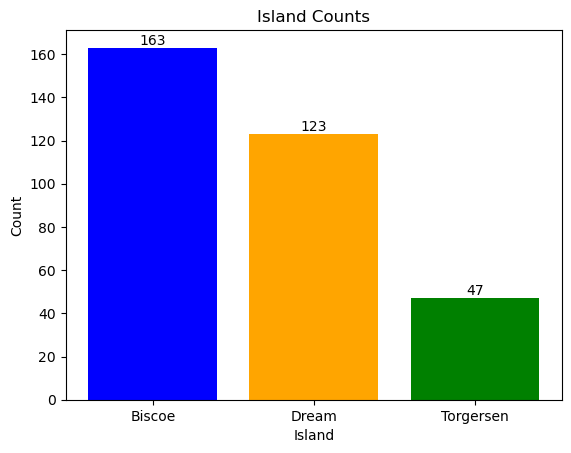

In [20]:
islands_list = penguins['island'].value_counts().index
islands_counts = penguins['island'].value_counts().values

barplot_island = plt.bar(islands_list, islands_counts, color = ['blue', 'orange', 'green'])
plt.title('Island Counts')
plt.xlabel('Island')
plt.ylabel('Count')
plt.bar_label(barplot_island, labels = islands_counts)
plt.show()

## Observations
Species and islands value_counts are very similar.  
Is each species located on a specific island?

## sex

In [21]:
penguins['sex'].value_counts()

male      168
female    165
Name: sex, dtype: int64

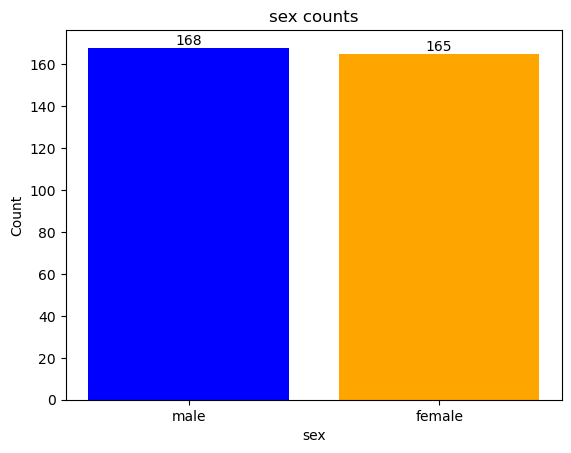

In [22]:
sex_list = penguins['sex'].value_counts().index
sex_counts = penguins['sex'].value_counts().values

barplot_sex = plt.bar( sex_list, sex_counts, color = ['blue', 'orange', 'green'])
plt.title('sex counts')
plt.xlabel('sex')
plt.ylabel('Count')
plt.bar_label(barplot_sex, labels = sex_counts)
plt.show()

## All categories

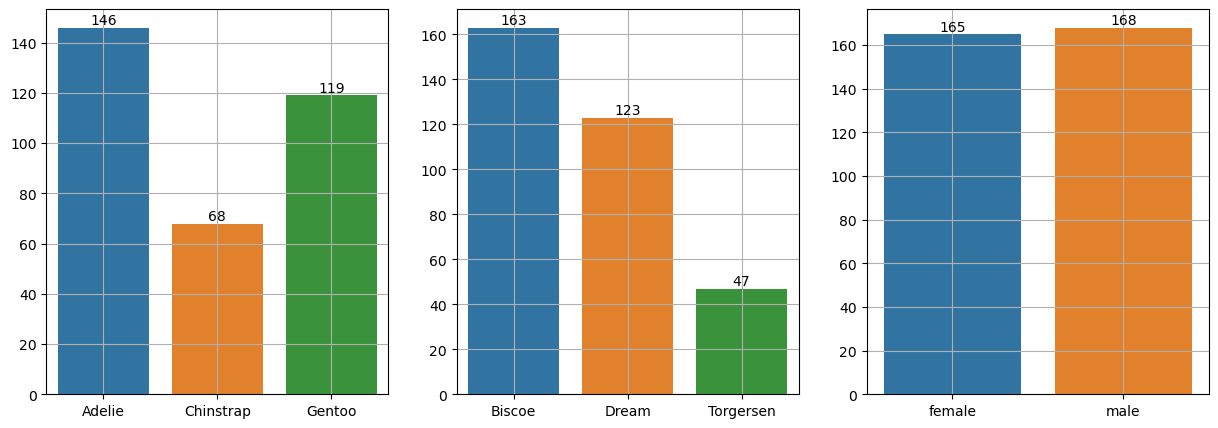

In [93]:
category_cols = penguins.select_dtypes(include=['category']).columns

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(category_cols):
    barplot = sns.barplot(x = penguins[col].value_counts().index, 
        y = penguins[col].value_counts().values, 
        ax = ax[i])
    barplot.bar_label(barplot.containers[0], fmt='%d')
    ax[i].grid(True)
plt.show()

    # countplot = sns.countplot(x=col, data=penguins, ax=ax[i])
    # for p in countplot.patches:
    #     countplot.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
    #                         ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
    #                         textcoords='offset points')


In [103]:
category_cols.to_list()

['species', 'island', 'sex']

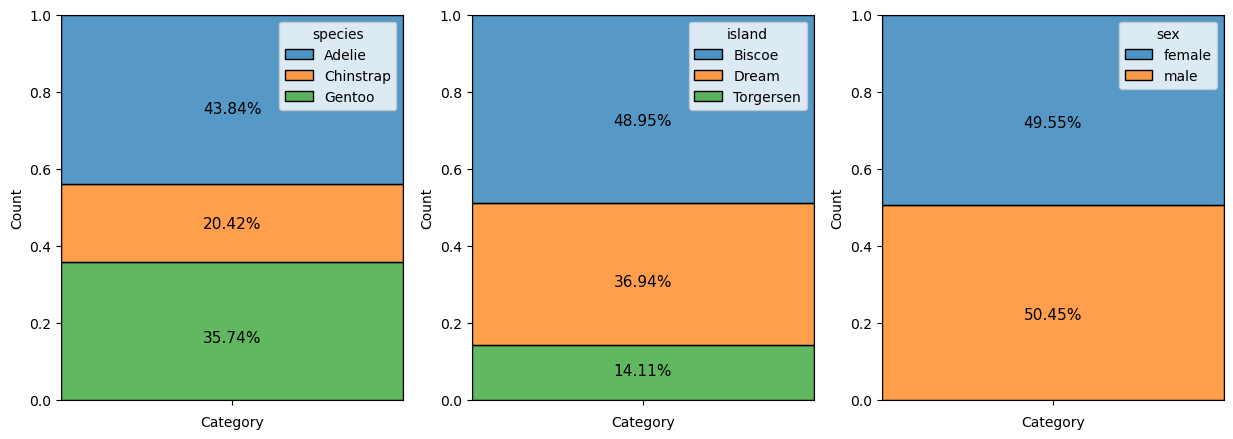

In [108]:
category_cols = penguins.select_dtypes(include=['category']).columns

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(category_cols):
    histplot = sns.histplot(data = penguins.assign( Category = ''),
                x = 'Category',
                hue = category_cols[i], 
                ax=ax[i],
                multiple = 'fill')

    height = 0
    for p in histplot.patches:
        height += p.get_height() 
        histplot.annotate(str( round(p.get_height() * 100, 2) ) + '%', (p.get_x() + p.get_width() / 2., height - 0.6 * p.get_height()),
                            ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                            textcoords='offset points')

# Questions

## Is each species located on a specific island?
The similarity between 'species' and 'island' counts suggest that  
species and island could be strongly related. Is this true?

In [25]:
penguins['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

In [26]:
penguins['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [27]:
species_island_table_all = pd.crosstab(penguins['species'], penguins['island'], margins = True)
species_island_table_all

island,Biscoe,Dream,Torgersen,All
species,,,,
Adelie,44,55,47,146
Chinstrap,0,68,0,68
Gentoo,119,0,0,119
All,163,123,47,333


In [28]:
species_island_table = species_island_table_all.iloc[:-1, :-1]
species_island_table

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0


In [29]:
# table with empty values instead of 0 values in species_island_table
species_island_table_empty = species_island_table.copy()
species_island_table_empty[species_island_table_empty == 0] = ''
species_island_table_empty

island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,,68,
Gentoo,119,,


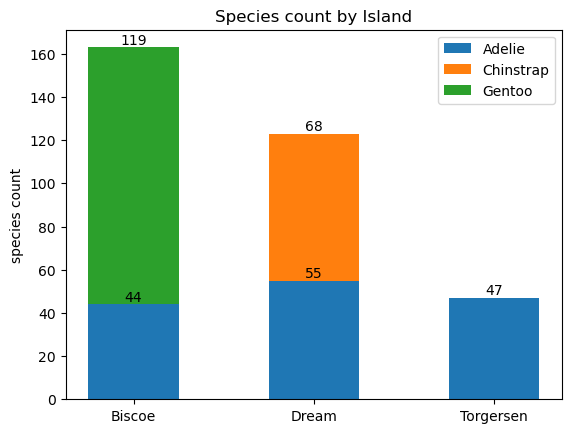

In [30]:
species_list = species_list = species_island_table.index
islands_list = species_island_table.columns

width = 0.5
fig, ax = plt.subplots()
bottom = np.zeros(3)

for i, species in enumerate(species_list):
    p = ax.bar(islands_list, species_island_table.iloc[i].values, width, bottom = bottom)

    plt.bar_label(p, labels = species_island_table_empty.iloc[i].values)
    bottom += species_island_table.iloc[i].values

ax.set_ylabel('species count')
ax.set_title('Species count by Island')
ax.legend(species_list)
plt.show()


## What is the distribution of females and males in the sample?
### species-sex tuple: 
Is the combined variable species-sex a good way to differentiate penguins into clear groups? 

In [31]:
penguins.loc[:,'species_sex_tuple'] = penguins.apply(lambda row: f"{row.species},{row.sex}", axis = 1)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species_sex_tuple
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,"Adelie,male"
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,"Adelie,female"
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,"Adelie,female"
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,"Adelie,female"
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,"Adelie,male"
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,"Chinstrap,male"
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,"Chinstrap,female"
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,"Chinstrap,male"
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,"Chinstrap,male"


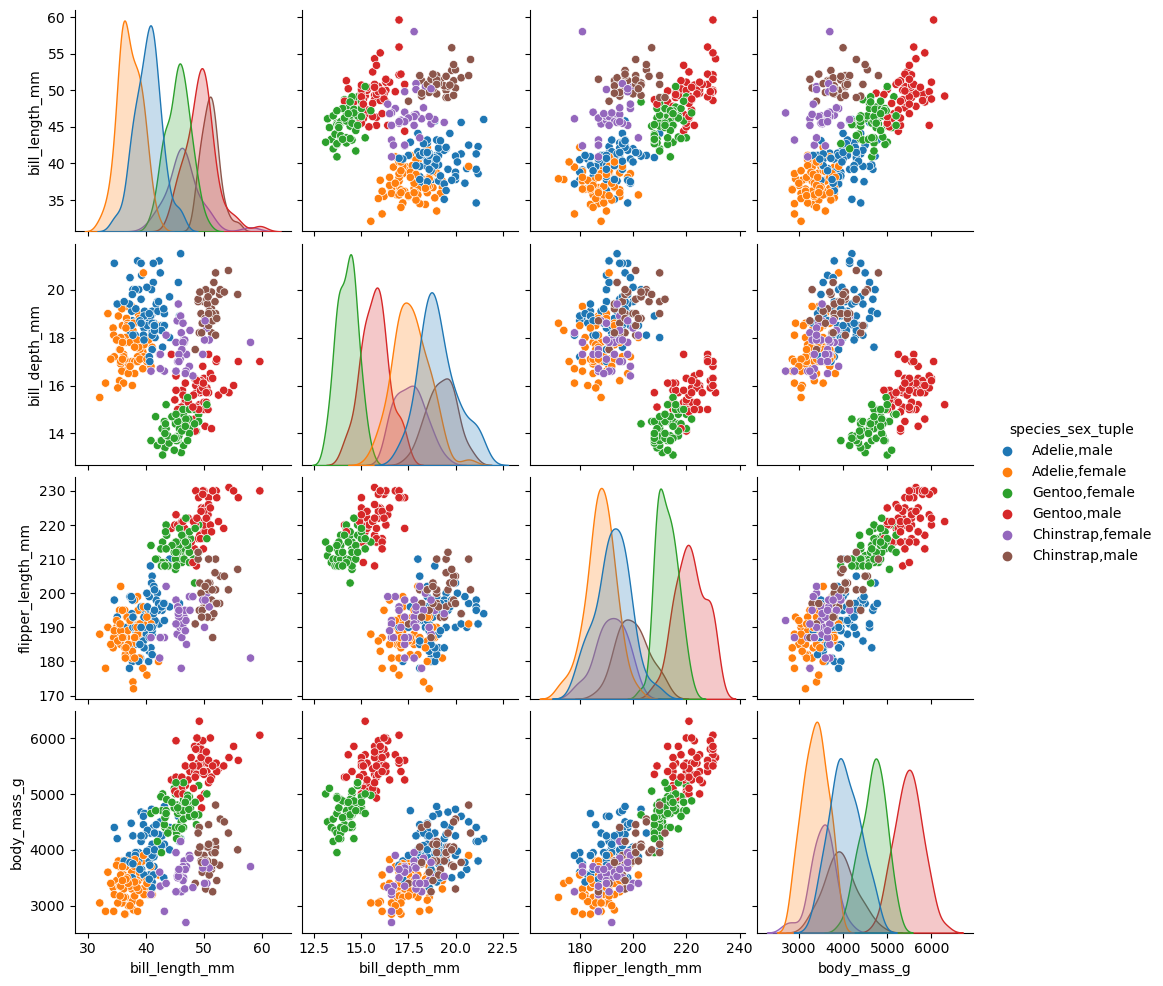

In [32]:
sns.pairplot( penguins, 
    hue = 'species_sex_tuple', 
    vars = ['bill_length_mm', 
            'bill_depth_mm', 
            'flipper_length_mm', 
            'body_mass_g']
    )

# Conclusions:
* bill_length_mm brigns valuable information if we want to know the species of a penguin,  
    since we can combine it with other measure and obtain separated groups by species.  
    A combination of two other measurements could be insufficient to differentiate  
    Adelie from Chinstrap. A predictive model will work much better if bill_length_mm  
    is part of the input.
* For length measurements, females tend to be clustered close to males, with a smaller  
    size and weight.
* The species distribution through islands is this:  
    - Adelie penguins are more or less evenly disributed over the three islands:  
        Dream, Torgersen, and Biscoe.  
    - Gentoo penguins are all found on Biescoe Island.   
    - Chinstrap penguins are all found on Dream island.
